# CART 和决策树中的超参数

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

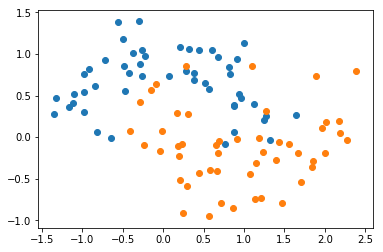

In [3]:
X, y = datasets.make_moons(noise=0.25, random_state=666)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

# 调用 sklearn.tree.DecisionTreeClassifier 对数据进行分类

1 用默认的参数，决策树将一直向下划分，直到基尼系数为0

In [4]:
from sklearn.tree import DecisionTreeClassifier
clf_tree1 = DecisionTreeClassifier()
clf_tree1.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

绘制决策边界

In [5]:
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)),
        np.linspace(axis[3], axis[2], int((axis[3]-axis[2])*100))
    )
    x_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(x_new)
    ss = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])
    
    plt.contourf(x0, x1, ss, linewidth=5, cmap=custom_cmap)

/home/crystal/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


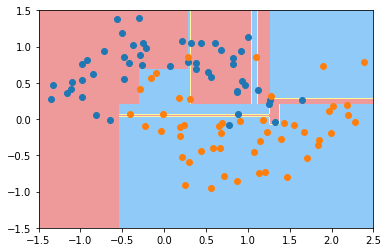

In [8]:
plot_decision_boundary(clf_tree1, axis = [-1.5, 2.5, -1.5, 1.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

很显然，数据是过拟合的, 因此，就需要我们”剪枝“，比如限制树的深度,限制叶子节点的个数等等

2 令超参数 max_depth = 2

In [9]:
clf_tree2 = DecisionTreeClassifier(max_depth=2)
clf_tree2.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

/home/crystal/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


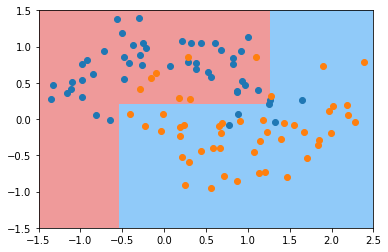

In [10]:
plot_decision_boundary(clf_tree2, axis=[-1.5, 2.5, -1.5, 1.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

决策边界是不是规整了很多, 但是会不会出现欠拟合呢

3 令超参数 min_sample_split=10 即在一个节点中，最少有10个数才进行划分

In [11]:
clf_tree3 = DecisionTreeClassifier(min_samples_split=10)
clf_tree3.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

绘制决策边界

/home/crystal/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


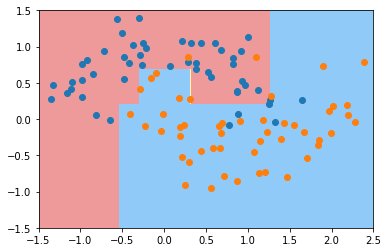

In [12]:
plot_decision_boundary(clf_tree3, axis=[-1.5, 2.5, -1.5, 1.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

4 令 min_samples_leaf=6, 即一个叶子节点中至少应有6个样本

In [13]:
clf_tree4 = DecisionTreeClassifier(min_samples_leaf=6)
clf_tree4.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=6, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

绘制决策边界

/home/crystal/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


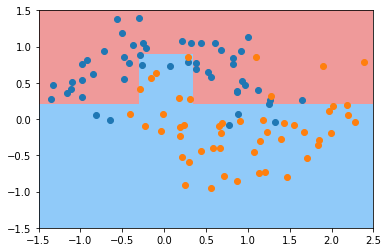

In [14]:
plot_decision_boundary(clf_tree4, axis=[-1.5, 2.5, -1.5, 1.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

5 令超参数 max_leaf_nodes=4 即最多有4个叶子节点

In [15]:
clf_tree5 = DecisionTreeClassifier(max_leaf_nodes=4)
clf_tree5.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=4, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

绘制决策边界

/home/crystal/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


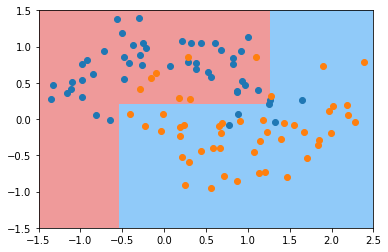

In [16]:
plot_decision_boundary(clf_tree5, axis=[-1.5, 2.5, -1.5, 1.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

实际中，参数之间可以互相组合，利用网格搜索的方式，选择出最佳的超参数

但是，你有可能也会发现, 即使参数已经相当优化, 但是用决策树分类的结果还不是很好,不用担心，决策树的思想与随机森林结合，会有较好的结果